
<img style="float: left;" src='Real-Estate-Transparent-PNG.png' width="350" height="150"> 
&emsp; <font size="25">LIETUVOS NEKILNOJAMOJO <br> &ensp;TURTO ANALIZĖ</font>

Tyrimo objektas - Lietuvos naujų butų rinkos apžvalga
<br>
Tyrimo uždaviniai:
<br>
    &emsp; - Nustatyti butų įsigijimo tendenciją kelių metų laikotarpyje
    <br>
    &emsp; - Reitinguoti miestus pagal naujų butų įsigijimą
    <br>
    &emsp; - Nustatyti kokio dydžio/tipo butai yra populiariausi Lietuvos rinkoje
    <br>
    &emsp; - Įvertinti galimą paskolų palūkanų padidėjimo poveikį naujų bustų įsigijimui
    <br>
    &emsp; - Įsivertinti kaip keičiasi gyvenotojų finansinis stabilumas brangstant prekėms ir paslaugoms
    <br>
Tyrimo metodai - analizuojami nekilnojamojo turto registro (NTR) ir Lietuvos statistikos departamento duomenys
<br>
Duomenų imtis - naudojami 15 ir 10 metų laikotarpių duomenys
<br>
Duomenų šaltiniai:
<br>
 &emsp; - NTR - https://www.registrucentras.lt/p/1074#gra6
 <br>
 &emsp; - Lietuvos statistikos departamentas - https://osp.stat.gov.lt/statistiniu-rodikliu-analize#/
 <br>
 &emsp; - 6 mėn. euribor duomenys - https://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=143.FM.M.U2.EUR.RT.MM.EURIBOR6MD_.HSTA

<br>
Išvada - remiantis oficialiais duomenimis palūkanų svyravimai neturi didelės įtakos butų įsigijimui Lietuvoje. Tačiau kylančios kainos mažina žmonių santaupas, todėl ateityje būstų įsigijimai turėtų sumažėti, arba bent jau pasikeistų įsigijamo būsto tipas, rinksis senesnę statybą, mažiau kambarių

In [32]:
from impgr import *

In [33]:
c.execute('use baigiamasis')

## 1. Analizuojame butų įsigijio tentenciją 2007 - 2022 metų laikotarpiu Lietuvoje
Importuojame duomenis per Pandas

In [34]:
butai = pd.read_csv('iregistruoti_butai.csv', parse_dates = ['Date']) 
butai.head()

,Date,Alytaus apskr.,Kauno apskr.,Klaipėdos apskr.,Marijampolės apskr.,Panevėžio apskr.,Šiaulių apskr.,Tauragės apskr.,Telšių apskr.,Utenos apskr.,Vilniaus apskr.,LT
0,2007-07-01,34253,167560,105334,29879,59051,73876,19642,32477,36269,245418,803759
1,2007-10-01,34362,167825,105907,29888,59062,73506,19641,32530,36289,246960,805970
2,2008-01-01,34478,168195,106127,29937,59111,73294,19694,32535,36304,248597,808272
3,2008-04-01,34717,168611,106490,29934,59079,73294,19695,32524,36341,250586,811271
4,2008-07-01,34751,169021,107072,29951,59015,73302,19700,32566,36336,251852,813566


In [35]:
dates = butai['Date'].values
countA = butai['Alytaus apskr.'].values
countK = butai['Kauno apskr.'].values
countKl = butai['Klaipėdos apskr.'].values
countM = butai['Marijampolės apskr.'].values
countP = butai['Panevėžio apskr.'].values
countS = butai['Šiaulių apskr.'].values
countT = butai['Tauragės apskr.'].values
countTl = butai['Telšių apskr.'].values
countU = butai['Utenos apskr.'].values
countV = butai['Vilniaus apskr.'].values
#print(countA)

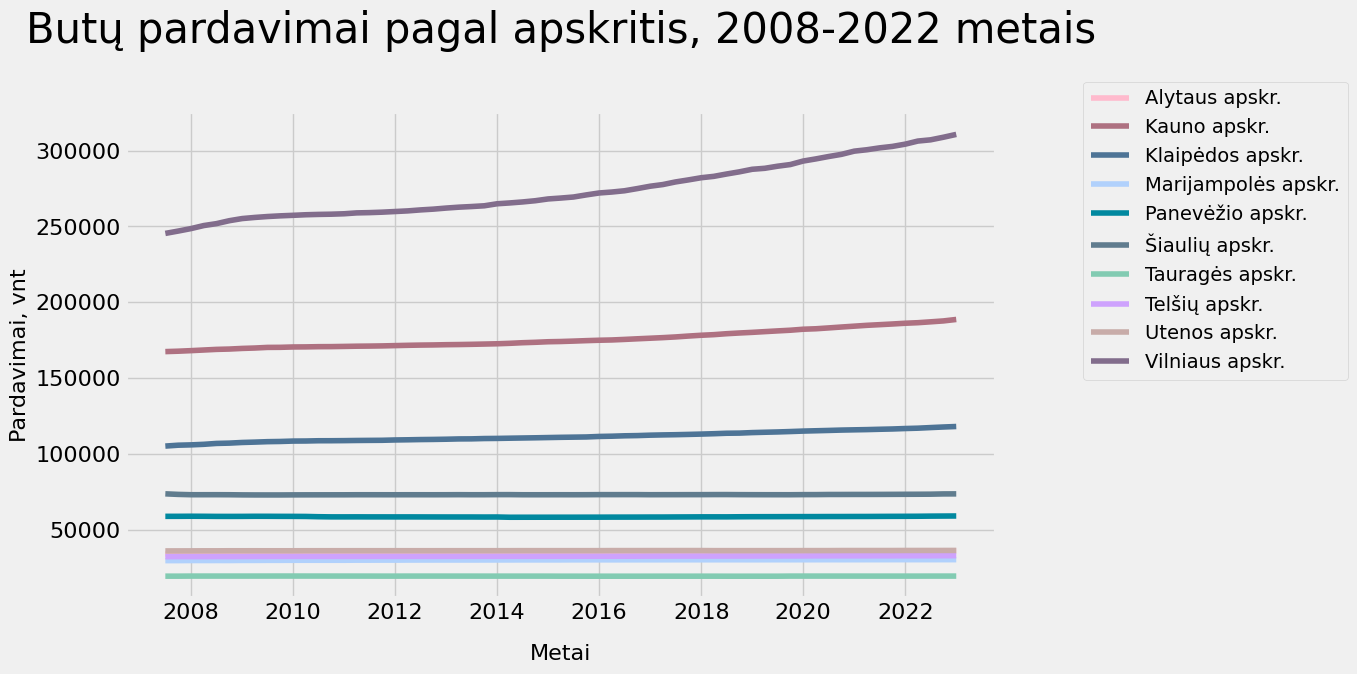

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
col = ['xkcd:pastel pink', "xkcd:mauve", 'xkcd:cadet blue', "xkcd:dark lavender", "xkcd:teal blue", "xkcd:blue grey","xkcd:pale teal","xkcd:lilac","xkcd:grey purple","xkcd:pinkish grey"]
A = ax.plot(dates, countA, label = 'Alytaus apskr.', color = 'xkcd:pastel pink')
K = ax.plot(dates, countK, label = 'Kauno apskr.',color = 'xkcd:mauve')
Kl = ax.plot(dates, countKl, label = 'Klaipėdos apskr.',color = 'xkcd:cadet blue')
M = ax.plot(dates, countM, label = 'Marijampolės apskr.',color = 'xkcd:powder blue')
P = ax.plot(dates, countP, label = 'Panevėžio apskr.',color = 'xkcd:teal blue')
S = ax.plot(dates, countS, label = 'Šiaulių apskr.',color = 'xkcd:blue grey')
T = ax.plot(dates, countT, label = 'Tauragės apskr.',color = 'xkcd:pale teal')
Tl = ax.plot(dates, countTl, label = 'Telšių apskr.',color = 'xkcd:lilac')
U = ax.plot(dates, countU, label = 'Utenos apskr.',color = 'xkcd:pinkish grey')
V = ax.plot(dates, countV, label = 'Vilniaus apskr.',color = 'xkcd:grey purple')
ax.set_title("Butų pardavimai pagal apskritis, 2008-2022 metais", fontsize=30, pad=50)
ax.set_xlabel('Metai', fontsize=16, labelpad=15)
ax.set_ylabel('Pardavimai, vnt', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.legend(loc=[1.1,0.45])
plt.show()

## 2. Panagrinėkime butų pardavimus 2022 ketvirtą ketvirtį pagal apskritis
Importuojame duomenis per Pandas

In [37]:
bt = pd.read_csv('iregistruoti_butai.csv', parse_dates = ['Date']) 
bt.head()

,Date,Alytaus apskr.,Kauno apskr.,Klaipėdos apskr.,Marijampolės apskr.,Panevėžio apskr.,Šiaulių apskr.,Tauragės apskr.,Telšių apskr.,Utenos apskr.,Vilniaus apskr.,LT
0,2007-07-01,34253,167560,105334,29879,59051,73876,19642,32477,36269,245418,803759
1,2007-10-01,34362,167825,105907,29888,59062,73506,19641,32530,36289,246960,805970
2,2008-01-01,34478,168195,106127,29937,59111,73294,19694,32535,36304,248597,808272
3,2008-04-01,34717,168611,106490,29934,59079,73294,19695,32524,36341,250586,811271
4,2008-07-01,34751,169021,107072,29951,59015,73302,19700,32566,36336,251852,813566


In [38]:
# Nusiskaitom įregistruotų būtų sąrašą, ir formatuojam datų stulpelį
kainos = pd.read_csv('kainu_idx.csv', parse_dates = ['Date']) 
kainos.head()

,Date,ketv,Be_vln,viso_LT
0,2022-10-01,4,238.8,212.0
1,2022-07-01,3,230.5,204.0
2,2022-04-01,2,219.2,201.4
3,2022-01-01,1,210.3,198.3
4,2021-10-01,4,199.9,184.9


In [39]:
merged = pd.merge(left=bt, right=kainos, how='inner', left_on='Date',right_on='Date')
merged.tail()

,Date,Alytaus apskr.,Kauno apskr.,Klaipėdos apskr.,Marijampolės apskr.,Panevėžio apskr.,Šiaulių apskr.,Tauragės apskr.,Telšių apskr.,Utenos apskr.,Vilniaus apskr.,LT,ketv,Be_vln,viso_LT
57,2021-10-01,36274,185749,116591,30503,59047,73534,19674,33056,36532,302726,893686,4,199.9,184.9
58,2022-01-01,36284,186245,116891,30501,59068,73569,19673,33067,36563,304215,896076,1,210.3,198.3
59,2022-04-01,36301,186600,117119,30502,59105,73599,19675,33075,36564,306244,898784,2,219.2,201.4
60,2022-07-01,36310,187173,117518,30501,59188,73645,19692,33084,36571,307056,900738,3,230.5,204.0
61,2022-10-01,36351,187767,117897,30505,59235,73815,19693,33114,36575,308763,903715,4,238.8,212.0


In [40]:
last_year = merged[merged['Date']>='2022-10-01'].iloc[[*range(1)],[*range(1,11)]]
last_year.head()
tr = last_year.transpose()
print(tr)



                         61
Alytaus apskr.        36351
Kauno apskr.         187767
Klaipėdos apskr.     117897
Marijampolės apskr.   30505
Panevėžio apskr.      59235
Šiaulių apskr.        73815
Tauragės apskr.       19693
Telšių apskr.         33114
Utenos apskr.         36575
Vilniaus apskr.      308763


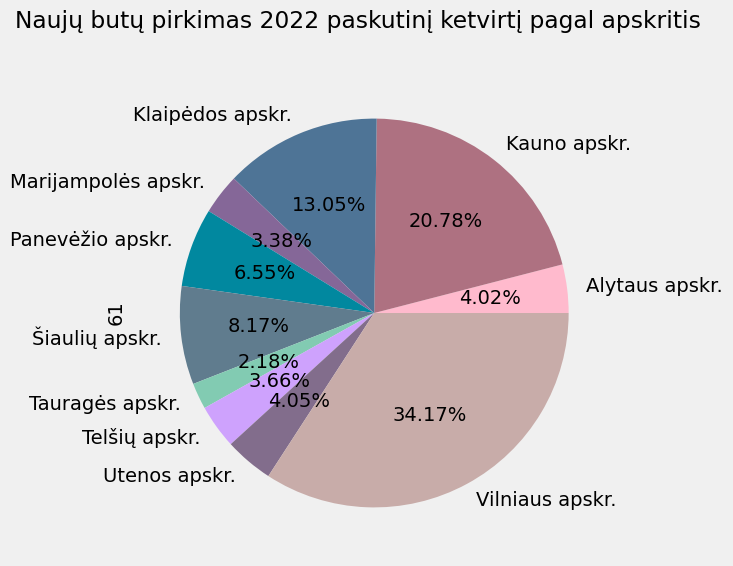

In [41]:
name = 'Naujų butų pirkimas 2022 paskutinį ketvirtį pagal apskritis'
col = ['xkcd:pastel pink', "xkcd:mauve", 'xkcd:cadet blue', "xkcd:dark lavender", "xkcd:teal blue", "xkcd:blue grey","xkcd:pale teal","xkcd:lilac","xkcd:grey purple","xkcd:pinkish grey"]
ax = tr.plot(kind = 'pie',autopct='%.2f%%',subplots=True, figsize=(11, 6) ,legend=False,colors=col, title = name)


#ax.set_title('Pandas plot metodas')
plt.show()

## 3. Išalizuokime kokio dydžio butai (pagal kamabrių skaičių) yra populiariausi Lietuvoje 2012 - 2021 metų laikotarpyje
Importuojame duomenis iš MySQL Workbench

In [42]:
#sql užklausos vykdymas per mysql/mariuadb kursorių
sql='''SELECT metai, bust_sk FROM baigiamasis.kamb_sk
WHERE kamb_sk = 1
ORDER BY metai ASC'''
c.execute(sql)
ans = c.fetchall()
metai, count1 = getLists(ans)
print(metai)

[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


In [43]:
#sql užklausos vykdymas per mysql/mariuadb kursorių
sql='''SELECT metai, bust_sk FROM baigiamasis.kamb_sk
WHERE kamb_sk = 2
ORDER BY metai ASC'''
c.execute(sql)
ans = c.fetchall()
metai, count2 = getLists(ans)
print(metai)

[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


In [44]:
#sql užklausos vykdymas per mysql/mariuadb kursorių
sql='''SELECT metai, bust_sk FROM baigiamasis.kamb_sk
WHERE kamb_sk = 3
ORDER BY metai ASC'''
c.execute(sql)
ans = c.fetchall()
metai, count3 = getLists(ans)
print(metai)

[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


In [45]:
#sql užklausos vykdymas per mysql/mariuadb kursorių
sql='''SELECT metai, bust_sk FROM baigiamasis.kamb_sk
WHERE kamb_sk = 4
ORDER BY metai ASC'''
c.execute(sql)
ans = c.fetchall()
metai, count4 = getLists(ans)
print(metai)

[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


In [46]:
#sql užklausos vykdymas per mysql/mariuadb kursorių
sql='''SELECT metai, bust_sk FROM baigiamasis.kamb_sk
WHERE kamb_sk = 5
ORDER BY metai ASC'''
c.execute(sql)
ans = c.fetchall()
metai, count5 = getLists(ans)
print(metai)

[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


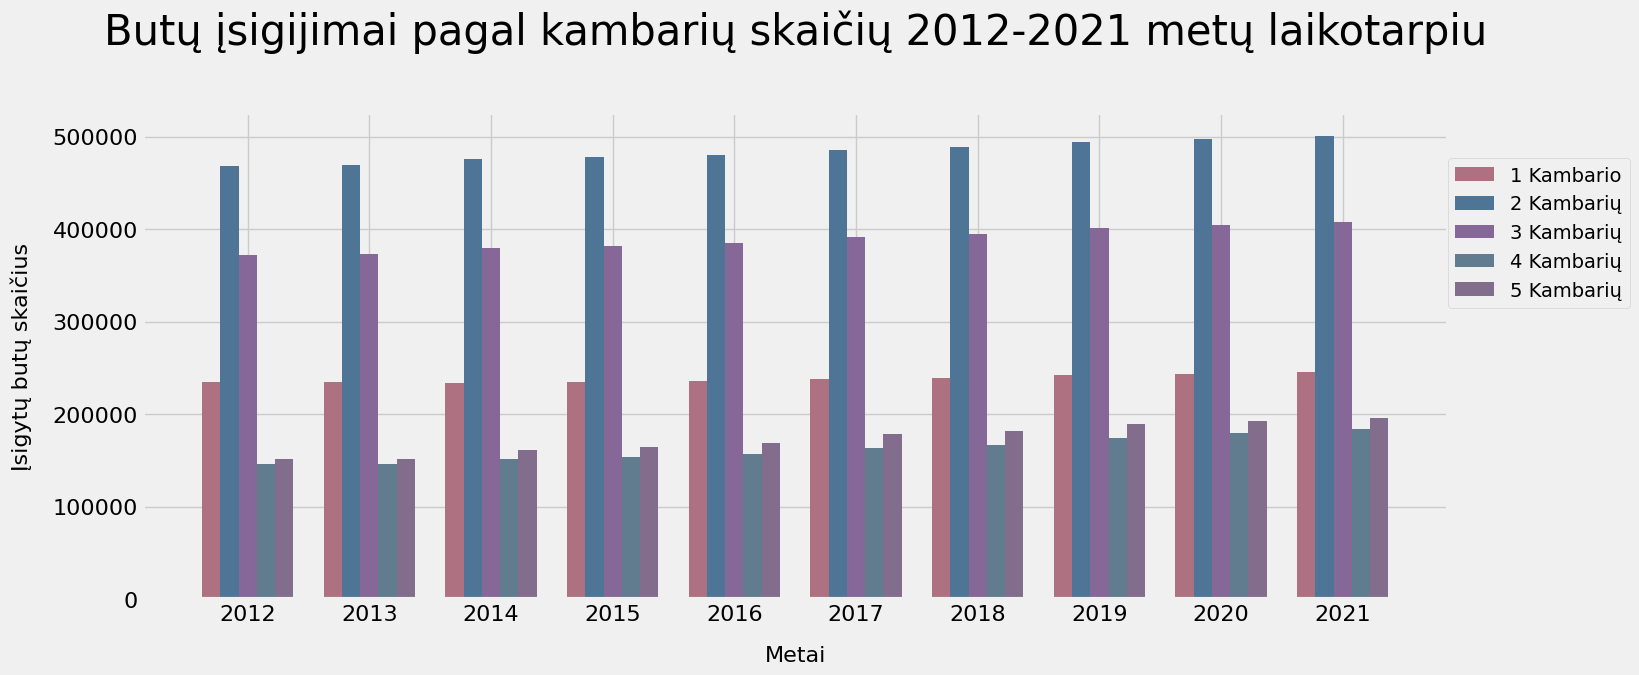

In [47]:
fig, ax = plt.subplots(figsize=(15,6))
w = 0.15
x = np.arange(1,len(metai)+1)
col = ['xkcd:pastel pink', "xkcd:mauve", 'xkcd:cadet blue', "xkcd:dark lavender", "xkcd:teal blue", "xkcd:blue grey","xkcd:pale teal","xkcd:lilac","xkcd:grey purple","xkcd:pinkish grey"]
A = ax.bar(x-w*2, count1, label = '1 Kambario', width=w, color="xkcd:mauve")
B = ax.bar(x-w, count2,label = '2 Kambarių', width=w, color = 'xkcd:cadet blue')
C = ax.bar(x, count3, label = '3 Kambarių', width=w, color = "xkcd:dark lavender")
D = ax.bar(x +w, count4, label = '4 Kambarių', width=w, color = "xkcd:blue grey")
E = ax.bar(x+w*2, count5, label = '5 Kambarių', width=w, color = "xkcd:grey purple")
ax.set_xticks(x)
ax.set_xticklabels(metai)

#fig.suptitle
ax.set_title('Butų įsigijimai pagal kambarių skaičių 2012-2021 metų laikotarpiu', fontsize=30, pad=50)
ax.set_xlabel('Metai', fontsize=16, labelpad=15)
ax.set_ylabel('Įsigytų butų skaičius', fontsize=16, labelpad=15)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.legend(loc=(1,0.6))

plt.show()

## 4. Įsivertinkime kaip kito EURIBOR palūkanos, kurios pastaraisiais metais smarkiai pabrangino paskolas
Importuojame duomenis iš MySQL Workbench

In [48]:
#sql užklausos vykdymas per mysql/mariuadb kursorių
sql='''SELECT Date, 3month_rate FROM baigiamasis.3month_euribor WHERE date > "2007-01-01"'''
c.execute(sql)
ans = c.fetchall()
date, rate = getLists(ans)
#print(date)

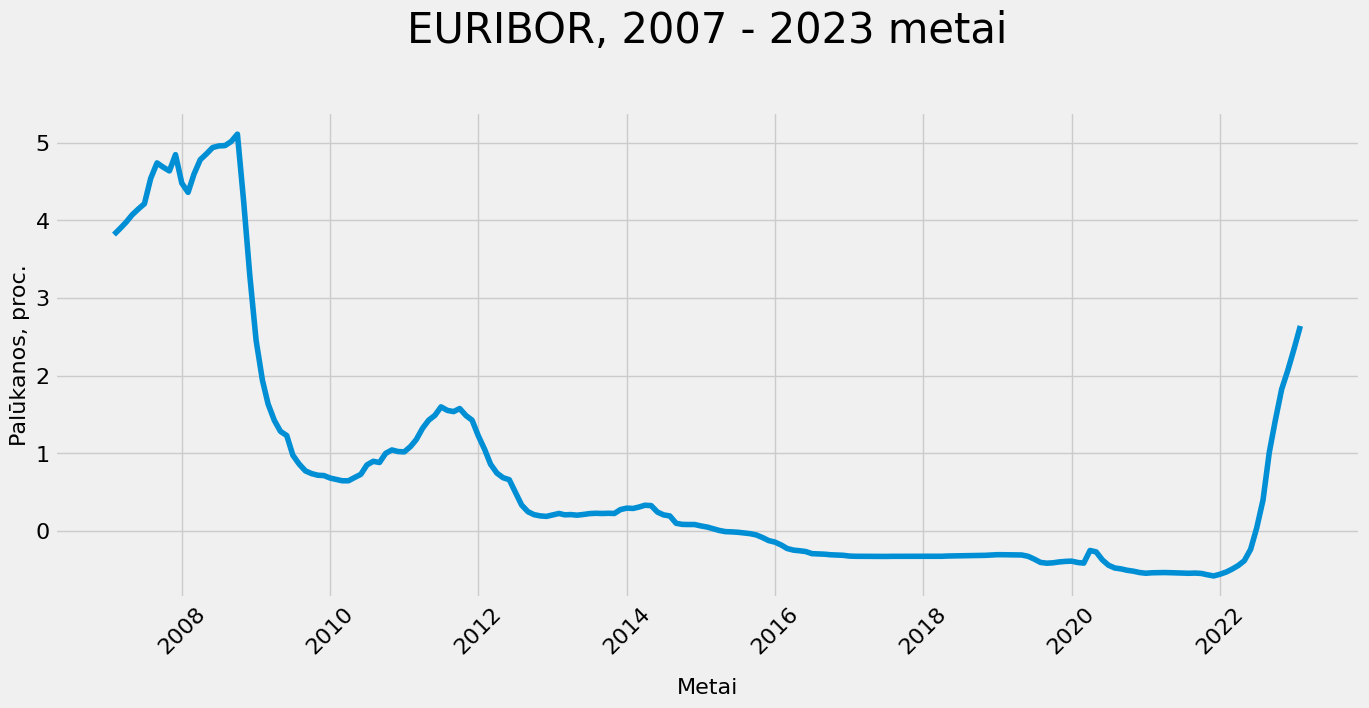

In [49]:
# EURIBOR Grafikas
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(date, rate)
#ax.bar(date1,LT)
ax.set_title("EURIBOR, 2007 - 2023 metai", fontsize=30, pad=50)
ax.set_xlabel('Metai', fontsize=16, labelpad=15)
ax.set_ylabel('Palūkanos, proc.', fontsize=16)
ax.tick_params(axis='x', labelsize=16, rotation = 45)
ax.tick_params(axis='y', labelsize=16)
#ax.legend(loc=1)
plt.show()

## 5.1. Išanalizuokime Lietuvos gyventojų finansinę padėtį pagal tai kiek santaupų jiems pavyksta sukaupti pastaraisiais metais
Importuojame duomenis iš MySQL Workbench

In [50]:
#sql užklausos vykdymas per mysql/mariuadb kursorių
sql='''SELECT santaupos, avg(resp_proc) FROM baigiamasis.santaupos
WHERE gyv_vt = 'Miestas'
GROUP BY santaupos;'''
c.execute(sql)
ans = c.fetchall()
sant, proc1 = getLists(ans)
#print(sant)

In [51]:
#sql užklausos vykdymas per mysql/mariuadb kursorių
sql='''SELECT santaupos, avg(resp_proc) FROM baigiamasis.santaupos
WHERE gyv_vt = 'Kaimas'
GROUP BY santaupos;'''
c.execute(sql)
ans = c.fetchall()
sant, proc2 = getLists(ans)
#print(sant)

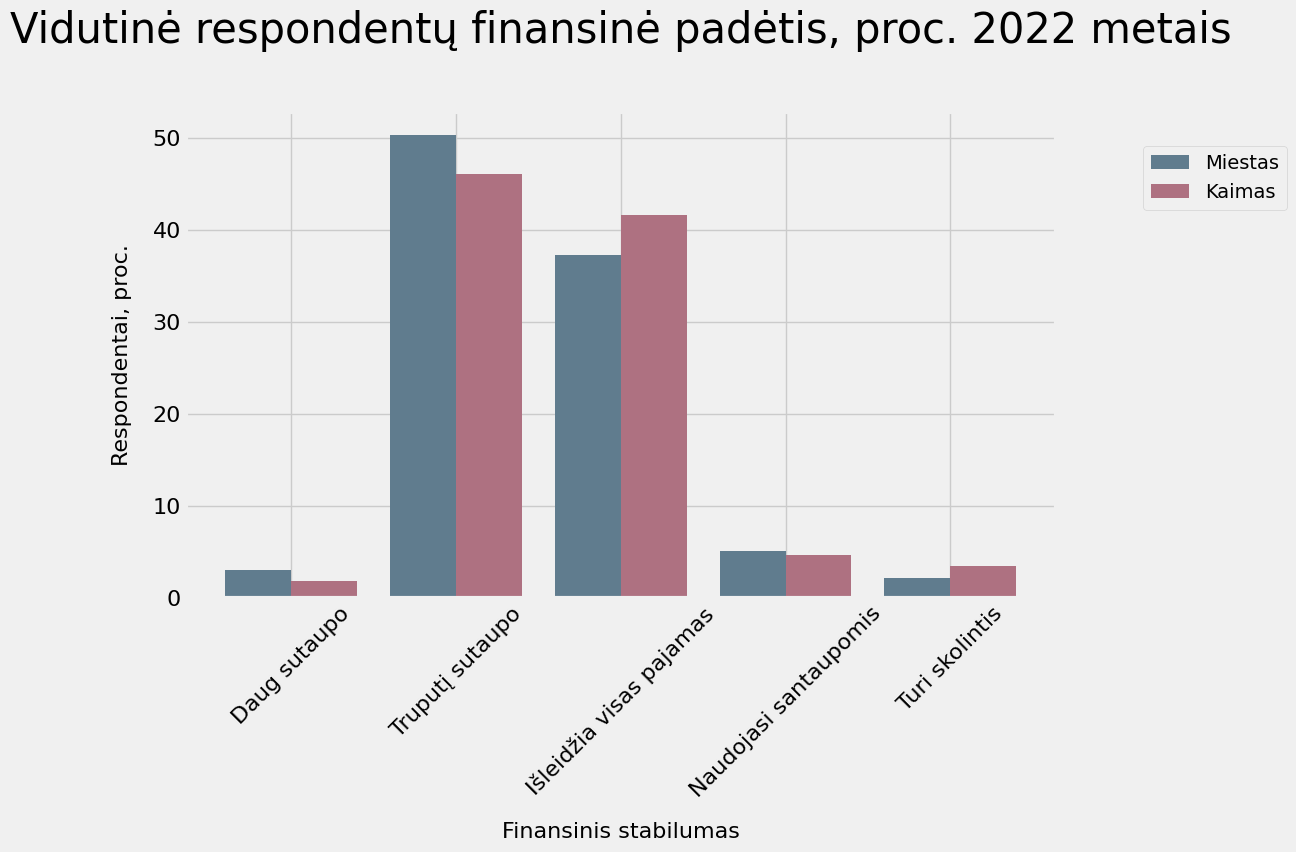

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(1,len(sant)+1)
w = 0.4
lbs = (['Daug sutaupo','Truputį sutaupo', 'Išleidžia visas pajamas','Naudojasi santaupomis','Turi skolintis'])
ax.bar(x-w/2,proc1, label = 'Miestas', width=w, color = "xkcd:blue grey")
ax.bar(x+w/2,proc2, label = 'Kaimas', width=w, color = "xkcd:mauve")

ax.set_xticks(x)
ax.set_xticklabels(lbs)
ax.set_title('Vidutinė respondentų finansinė padėtis, proc. 2022 metais', fontsize=30, pad=50)
ax.set_xlabel('Finansinis stabilumas', fontsize=16,labelpad=15)
ax.set_ylabel('Respondentai, proc.', fontsize=16, labelpad=15)
ax.tick_params(axis='x', labelsize=16, rotation = 45)
ax.tick_params(axis='y', labelsize=16)
ax.legend(loc=(1.1,0.8))
plt.show()

## 5.2. Patikrinkime kaip per metus pakito gyventojų santaupų kaupimas ir finansinis stabilumas
Importuojame duomenis iš MySQL Workbench

In [53]:
#sql užklausos vykdymas per mysql/mariuadb kursorių
sql='''SELECT santaupos, avg(resp_proc) FROM baigiamasis.santaupos_2
WHERE year = 2022
GROUP BY santaupos;'''
c.execute(sql)
ans = c.fetchall()
sant, proc3 = getLists(ans)
print(sant)

['Daug sutaupo' 'TruputÄ¯ sutaupo' 'IÅ¡leidÅ¾ia viskÄ…, kÄ… gauna'
 'Turi leisti santaupas' 'Turi skolintis']


In [54]:
#sql užklausos vykdymas per mysql/mariuadb kursorių
sql='''SELECT santaupos, avg(resp_proc) FROM baigiamasis.santaupos_2
WHERE year = 2021
GROUP BY santaupos;'''
c.execute(sql)
ans = c.fetchall()
sant, proc4 = getLists(ans)
print(sant)

['Daug sutaupo' 'TruputÄ¯ sutaupo' 'IÅ¡leidÅ¾ia viskÄ…, kÄ… gauna'
 'Turi leisti santaupas' 'Turi skolintis']


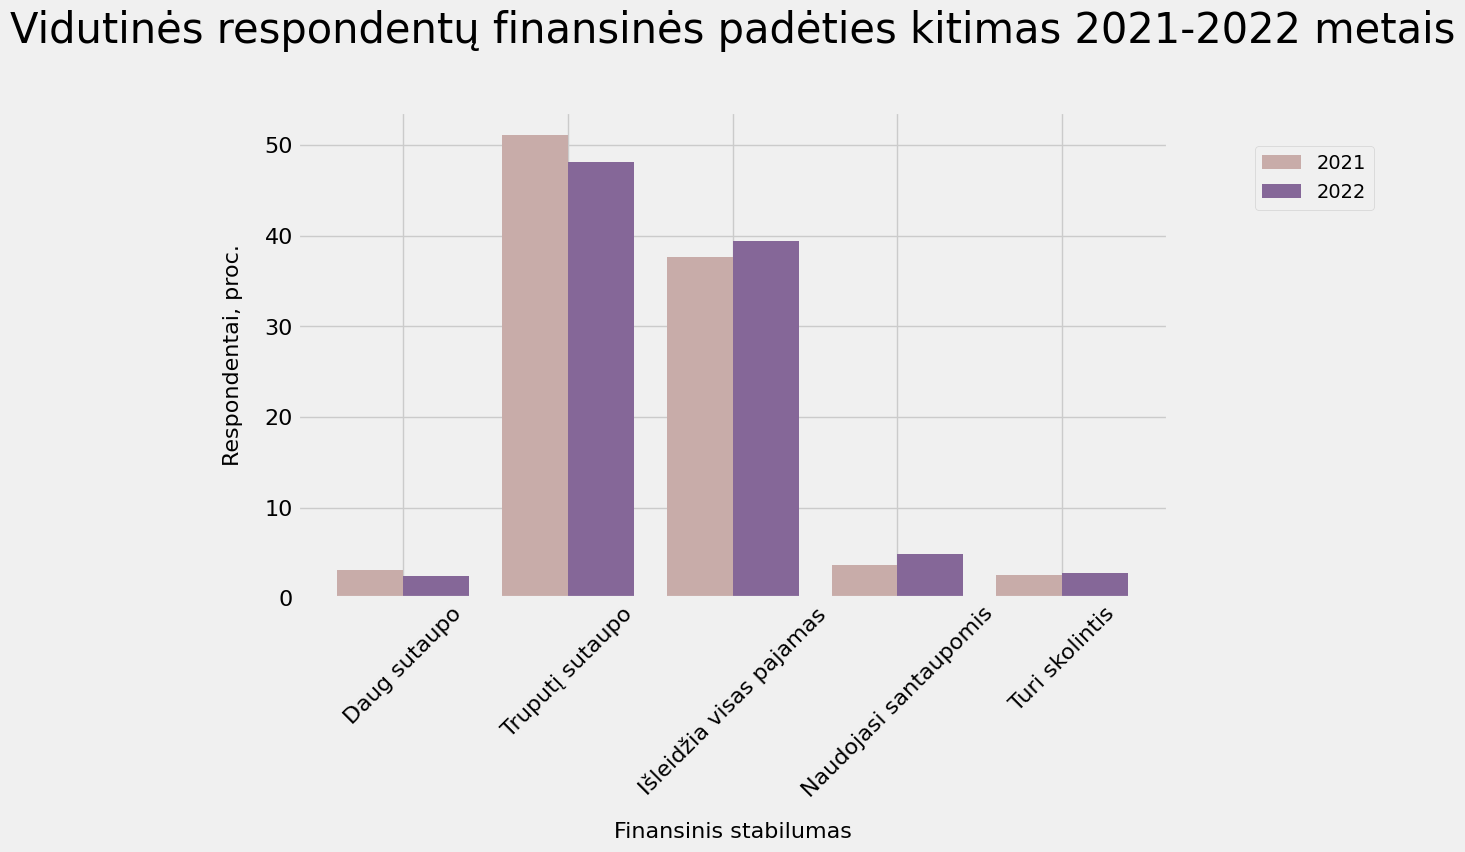

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(1,len(sant)+1)
w = 0.4
lbs = (['Daug sutaupo','Truputį sutaupo', 'Išleidžia visas pajamas','Naudojasi santaupomis','Turi skolintis'])
ax.bar(x-w/2,proc4, label = '2021', width=w, color = "xkcd:pinkish grey")
ax.bar(x+w/2,proc3, label = '2022', width=w, color = "xkcd:dark lavender")

ax.set_xticks(x)
ax.set_xticklabels(lbs)
ax.set_title('Vidutinės respondentų finansinės padėties kitimas 2021-2022 metais', fontsize=30, pad=50)
ax.set_xlabel('Finansinis stabilumas', fontsize=16,labelpad=15)
ax.set_ylabel('Respondentai, proc.', fontsize=16, labelpad=15)
ax.tick_params(axis='x', labelsize=16, rotation = 45)
ax.tick_params(axis='y', labelsize=16)
ax.legend(loc=(1.1,0.8))
plt.show()